In [1]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
from IPython import display

import torch
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
import os
from ood_detection.classification_utils import full_classification
from ood_detection.config import Config
import torchvision

from datasets import caltech, flowers102, caltech_cub, svhn, pneumonia, imagenet, cifar, lsun, corruptions
from torch.utils.data import DataLoader
import clip

def plot_pairs(dataset, seconds = 2.):
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)    
    for img, label in dataloader:
        img = img.squeeze().permute(1,2,0)
        print(f"Label is: {label}, a {dataset.idx_to_class[int(label)]}")
        display.display(plt.imshow(img))
        plt.show()
        display.clear_output(wait=True)
        time.sleep(seconds)
class ShapePrinter:
    def __call__(self, sample):
        try:
            print(sample.shape)
        except:
            print(f"no shape attribute, size: {sample.size}")
        return sample
    
class ToInter:
    def __call__(self, sample):
        return sample / 255

/home/fmeyer/miniconda3/envs/ood/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = Config.DATAPATH
train = False
clip_model, transform_clip = clip.load(Config.VISION_MODEL)
corruption_dict = corruptions.Corruptions


In [14]:
def get_transform(c, sev):
    transforms = []
    for trans in transform_clip.transforms[:-2]:
        transforms.append(trans)
    transforms.append(c(sev))
    transforms.append(transform_clip.transforms[-2])
    transforms.append(ToInter())
    return Compose(transforms)

In [15]:
name

'Frost'

Brightness: 3
kitchen


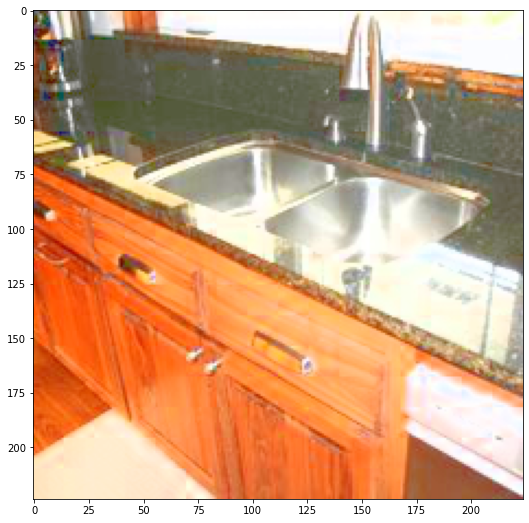

In [ ]:
passing = True

for name, corr in corruption_dict.items():
    if name == 'Snow':
        passing = False
        print(f"Starting with {name}")
    if passing:
        print(f"skipping {name}")
        continue
    for severity in range(1,6):
        custom_transform = get_transform(corr, severity)
        dataset = lsun.OodLSUN(data_path, transform=custom_transform, train = train)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
        for i, (image, target) in enumerate(dataloader):
            print(f"{name}: {severity}")
            print(dataloader.dataset.idx_to_class[int(target)])
            plt.figure(figsize = (9,9))
            plt.imshow(image.squeeze().permute((1,2,0)))
            plt.show()
            time.sleep(1.5)
            display.clear_output(wait=True)
            if i == 3:
                break

            